          PL Intensity (kcps)
Time (s)                     
5.71                      4.1
5.72                      4.8
5.73                      4.1
5.74                      4.8
5.75                      3.0


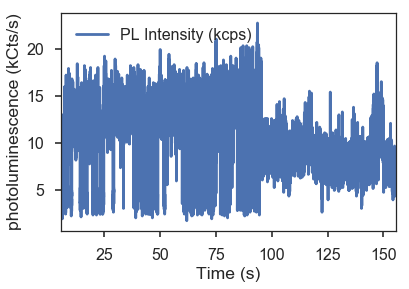

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 27 17:17:43 2018

Blinker analysis

@author: Viva Horowitz
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import seaborn as sns
sns.set(style='ticks')
sns.set_context('poster')

datadate = '2018-05-31'
datafolder = r'O:\User\Viva\data\2018-05-31_blinking-statistics'
filename = r'04-21-2018.11,00am.FIBedhBN\01.txt'
analysisfolder = r'O:\User\Viva\analysis\blinker_analysis'

os.chdir(datafolder)

tname = 'Time (s)'
PLname = 'PL Intensity (kcps)'

data = pd.read_csv(filename,
                   skiprows=1,
                   header=None,
                   sep='\t',
                   names=['Time (s)','PL Intensity (kcps)'],
                   usecols=[0,1])

data = data.set_index(tname)
print(data.head())

data.plot()
plt.ylabel('photoluminescence (kCts/s)')
plt.show()

filename = r'04-21-2018.11,00am.FIBedhBN-01.txt'
os.chdir(analysisfolder)
today = datetime.date.isoformat(datetime.date.today())
if not os.path.exists('taken-' + datadate):
    os.makedirs('taken-' + datadate)
os.chdir('taken-' + datadate)

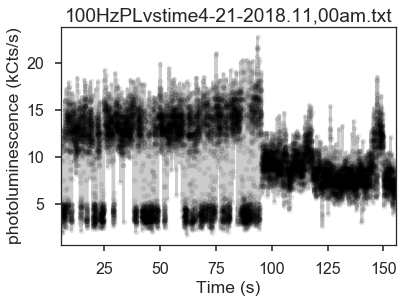

In [2]:
fig1,axPL = plt.subplots()
#axPL.plot(data, 'k')
#axPL.legend.remove()
data.plot(marker='.',linestyle='None',legend=False, ax=axPL, color='k',  alpha=.1)
data.plot(legend=False, alpha=0.2, ax=axPL, color='k')
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)

plt.title(filename)

plt.savefig(today + ',' + filename+'blinking.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+'blinking.png', bbox_inches='tight', dpi=200)

plt.show()

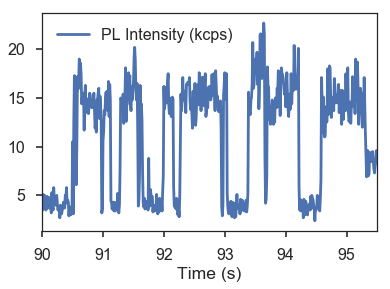

In [13]:
datatrim = data[90:95.5]

datatrim.plot()
plt.show()

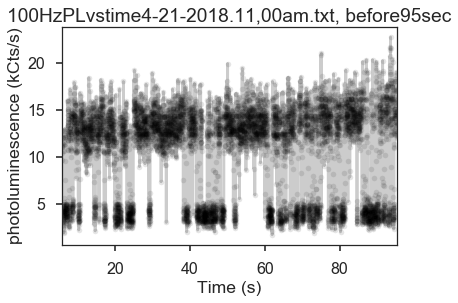

In [14]:
data=data[:95.3]
filename = filename + ', before95sec'

fig1,axPL = plt.subplots()
#axPL.plot(data, 'k')
#axPL.legend.remove()
data.plot(marker='.',linestyle='None',legend=False, ax=axPL, color='k',  alpha=.1)
data.plot(legend=False, alpha=0.2, ax=axPL, color='k')
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)

plt.title(filename)

plt.savefig(today + ',' + filename+'blinking.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+'blinking.png', bbox_inches='tight', dpi=200)

plt.show()

In [15]:
# The data was collected at a particular rate
timesetting = data.index[1]-data.index[0]
fps = 1/timesetting
timesetting

0.0099999999999997868

In [16]:
binsequence = np.arange(data.min(), data.max(), fps/350)
len(binsequence)

74

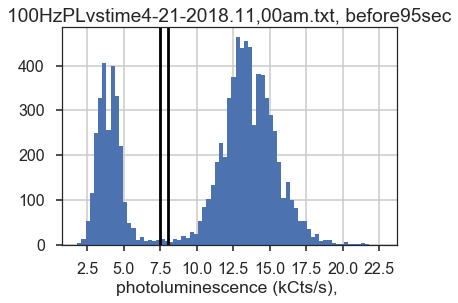

In [19]:
data.hist(bins= binsequence)
plt.xlabel('photoluminescence (kCts/s), ')
plt.locator_params(axis='x', nbins=10)
ax = plt.gca()

plt.title(filename)

# Need to pick an appropriate threshold between on and off. 
uthreshold = 8
lthreshold = uthreshold-.5

ax.axvline(x=uthreshold, color='k')
ax.axvline(x=lthreshold, color = 'k')
#ax.tick_params(axis='x',which='minor',bottom='on')
#ax.xaxis.set_minor_locator(minorLocator)
plt.show()

In [20]:
data.head()

,PL Intensity (kcps)
Time (s),
5.71,4.1
5.72,4.8
5.73,4.1
5.74,4.8
5.75,3.0


In [21]:
data.count()

PL Intensity (kcps)    8960
dtype: int64

In [22]:
data.describe()

,PL Intensity (kcps)
count,8960.000000
mean,10.822612
std,4.649536
min,1.800000
25%,4.700000
50%,12.700000
75%,14.200000
max,22.700000


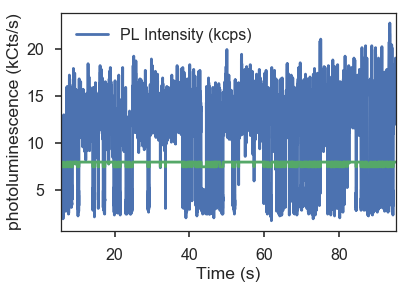

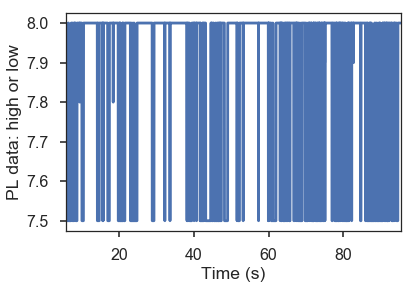

In [23]:
# With an uthreshold and an lthreshold
# This code has an in between status where it won't be counted as remaining in the state 
# but it won't be counted in the other state, either. 
# This seems like the most straightforward way to deal with (rare) cases in between.
# Other options are shown.


threshdata = data[PLname].clip(upper=uthreshold, lower=lthreshold)

data.plot()
plt.ylabel('photoluminescence (kCts/s)')
threshdata.plot()

plt.figure()
threshdata.plot()
plt.ylabel('PL data: high or low')
plt.show()


In [24]:
# Main method: in between status where it won't be counted as remaining in the state 
# but it won't be counted in the other state, either.
downtimes2= threshdata[threshdata != uthreshold].index
uptimes2=threshdata[threshdata != lthreshold].index

print(uptimes2)
print(downtimes2)

Float64Index([ 5.77,  5.78,  5.79,   5.8,  5.81,  5.82,  5.83,  5.84,  5.85,
               5.86,
              ...
              95.21, 95.22, 95.23, 95.24, 95.25, 95.26, 95.27, 95.28, 95.29,
               95.3],
             dtype='float64', name=u'Time (s)', length=6348)
Float64Index([ 5.71,  5.72,  5.73,  5.74,  5.75,  5.76,  5.91,  5.92,  5.93,
               5.94,
              ...
              94.49,  94.5, 94.51, 94.52, 94.53, 94.54, 94.55, 94.56, 94.57,
              94.58],
             dtype='float64', name=u'Time (s)', length=2627)


In [25]:
# Alternate option (not used)
uptimes= threshdata[threshdata == uthreshold].index
downtimes=threshdata[threshdata == lthreshold].index

print(uptimes)
print(downtimes)

Float64Index([ 5.77,  5.78,  5.79,   5.8,  5.81,  5.82,  5.83,  5.84,  5.85,
               5.86,
              ...
              95.21, 95.22, 95.23, 95.24, 95.25, 95.26, 95.27, 95.28, 95.29,
               95.3],
             dtype='float64', name=u'Time (s)', length=6333)
Float64Index([ 5.71,  5.72,  5.73,  5.74,  5.75,  5.76,  5.91,  5.92,  5.93,
               5.94,
              ...
              94.49,  94.5, 94.51, 94.52, 94.53, 94.54, 94.55, 94.56, 94.57,
              94.58],
             dtype='float64', name=u'Time (s)', length=2612)


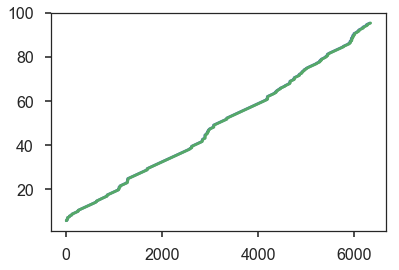

In [26]:
plt.plot(uptimes)
plt.plot(uptimes2)
plt.show()

In [27]:
uptimes[:-1]

Float64Index([ 5.77,  5.78,  5.79,   5.8,  5.81,  5.82,  5.83,  5.84,  5.85,
               5.86,
              ...
               95.2, 95.21, 95.22, 95.23, 95.24, 95.25, 95.26, 95.27, 95.28,
              95.29],
             dtype='float64', name=u'Time (s)', length=6332)

In [28]:
uptimes[1:]

Float64Index([ 5.78,  5.79,   5.8,  5.81,  5.82,  5.83,  5.84,  5.85,  5.86,
               5.87,
              ...
              95.21, 95.22, 95.23, 95.24, 95.25, 95.26, 95.27, 95.28, 95.29,
               95.3],
             dtype='float64', name=u'Time (s)', length=6332)

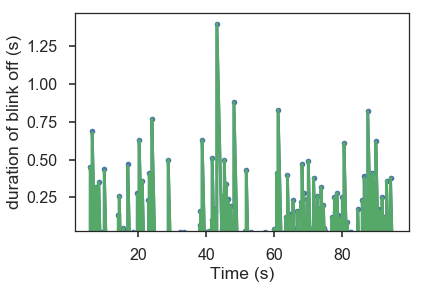

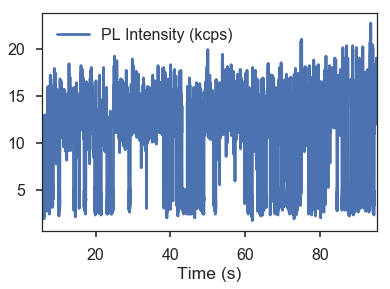

In [29]:
# We can compare the two ways of interpreting blinks.
# There is a discrepancy at about 22 seconds between the two interpretations. 
# It's a matter of whether we consider it stayed off or 
# if we consider that it came up enough to have ended the off blink and began another.
# I tend to think it ended one and began another in this case, so I'm going to use uptimesep2 as my off duration.

# subtracting each time from the last time we had the same state gives the amount of time it was not in that state.
# Therefore the separation between up times is in fact the duration of time off.
uptimesep = uptimes[1:] - uptimes[:-1]
uptimesep2 = uptimes2[1:] - uptimes2[:-1]
plt.plot(uptimes[:-1],uptimesep, '.-')
plt.plot(uptimes2[:-1],uptimesep2, '-')
plt.ylim(ymin=3*timesetting)
#plt.axis('equal')
plt.xlabel(tname)
plt.ylabel('duration of blink off (s)')
plt.figure()
data.plot()
plt.show()

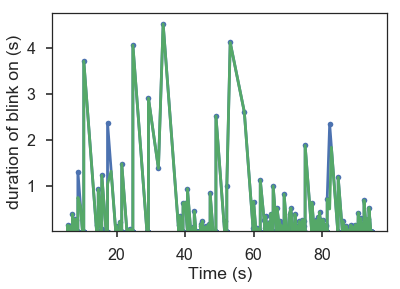

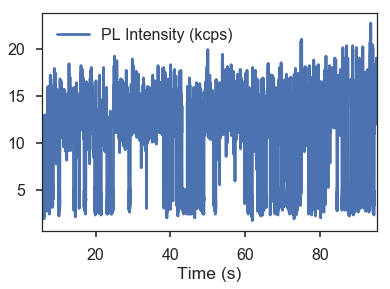

In [30]:
# We can compare the two ways of interpreting blinks. It looks like they mostly agree.

downtimesep = downtimes[1:] - downtimes[:-1]
downtimesep2 = downtimes2[1:] - downtimes2[:-1]
plt.plot(downtimes[:-1],downtimesep,'.-')
plt.plot(downtimes2[:-1],downtimesep2,'-')
plt.ylim(ymin=3*timesetting)
#plt.axis('equal')
plt.xlabel(tname)
plt.ylabel('duration of blink on (s)')
#plt.figure()
data.plot()
plt.show()

In [31]:
downtimesep2

Float64Index([            0.01,             0.01,             0.01,
                          0.01,             0.01,             0.15,
                          0.01,             0.01,             0.01,
                          0.01,
              ...
              0.00999999999999,             0.01,             0.01,
              0.00999999999999,             0.01,             0.01,
              0.00999999999999,             0.01, 0.00999999999999,
                          0.01],
             dtype='float64', name=u'Time (s)', length=2626)

In [32]:
# I chose to use downtimesep2 and uptimesep2, as detailed above.

ontimes = filter(lambda a: a > 1.5*timesetting, downtimesep2)
offtimes = filter(lambda a: a > 1.5*timesetting, uptimesep2)

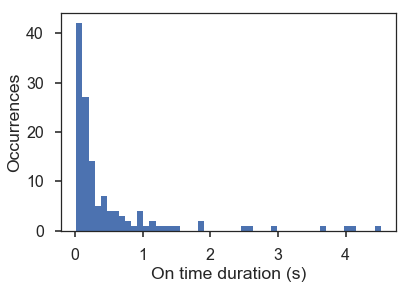

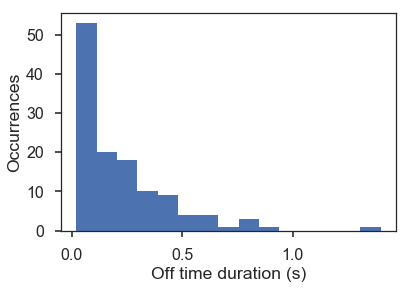

In [33]:
# Choose a nice number of bins to see how the data look.

numonbins = 50
numoffbins = 15

plt.hist(ontimes, bins=numonbins)
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
plt.show()
plt.hist(offtimes, bins=numoffbins)
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
plt.show()

In [34]:
## https://stackoverflow.com/questions/32765333/how-do-i-replicate-this-matlab-function-in-numpy/32765547#32765547

def histc(X, bins):
    map_to_bins = np.digitize(X,bins)
    r = np.zeros(bins.shape)
    for i in map_to_bins:
        r[i-1] += 1
    return [r, map_to_bins]

In [35]:
# http://code.activestate.com/recipes/66472-frange-a-range-function-with-float-increments/
# could also use linspace

def frange(start, end=None, inc=None):
    "A range function, that does accept float increments..."

    if end == None:
        end = start + 0.0
        start = 0.0

    if inc == None:
        inc = 1.0

    L = []
    while 1:
        next = start + len(L) * inc
        if inc > 0 and next >= end:
            break
        elif inc < 0 and next <= end:
            break
        L.append(next)
        
    return L

In [36]:
## I decided to start my bins at 0. 
# This might be different from the built in hist function.

oninc = max(ontimes)/numonbins
onbins= frange(0,max(ontimes)+oninc*3,oninc)
#print(onbins[0:5])


offinc = max(offtimes)/numoffbins
offbins=np.linspace(0,max(offtimes),numoffbins+1)
print("linspace option (not used):")
print(offbins)
offbins= frange(0,max(offtimes),offinc)
print("frange approach:")
print(offbins)
#print(offbins[0:5])
offbins= frange(0,max(offtimes)+offinc*3,offinc)
print("frange approach and pad 3 bins to right (used):")
print(offbins)

centeredonbins = frange(oninc/2,max(ontimes)+oninc*3+oninc/2,oninc)
centeredoffbins= frange(offinc/2,max(offtimes)+offinc*3+offinc/2,offinc)
#centeredoffbins=np.linspace(offinc/2,max(offtimes)+offinc/2,numoffbins)


print('\n')
print(onbins[-5:])
print(centeredonbins[-5:])

print("Make sure ")
print(len(centeredonbins))
print(len(onbins))
print(len(centeredoffbins))
print(len(offbins))

linspace option (not used):
[ 0.          0.09333333  0.18666667  0.28        0.37333333  0.46666667
  0.56        0.65333333  0.74666667  0.84        0.93333333  1.02666667
  1.12        1.21333333  1.30666667  1.4       ]
frange approach:
[0.0, 0.09333333333333324, 0.18666666666666648, 0.27999999999999969, 0.37333333333333296, 0.46666666666666623, 0.55999999999999939, 0.65333333333333266, 0.74666666666666592, 0.83999999999999919, 0.93333333333333246, 1.0266666666666657, 1.1199999999999988, 1.213333333333332, 1.3066666666666653]
frange approach and pad 3 bins to right (used):
[0.0, 0.09333333333333324, 0.18666666666666648, 0.27999999999999969, 0.37333333333333296, 0.46666666666666623, 0.55999999999999939, 0.65333333333333266, 0.74666666666666592, 0.83999999999999919, 0.93333333333333246, 1.0266666666666657, 1.1199999999999988, 1.213333333333332, 1.3066666666666653, 1.3999999999999986, 1.4933333333333318, 1.5866666666666651]


[4.3392000000000035, 4.4296000000000033, 4.5200000000000031

In [37]:
onhist = histc(ontimes, np.asarray(onbins))
offhist = histc(offtimes, np.asarray(offbins))

In [38]:
onhist

[array([ 41.,  26.,  15.,   6.,   7.,   4.,   2.,   5.,   1.,   2.,   3.,
          2.,   1.,   2.,   1.,   1.,   1.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.]),
 array([ 2,  2,  5,  4,  3,  9,  7, 42,  2, 11,  1, 14, 12, 15,  2,  1,  1,
         1,  3, 17,  1,  1,  1, 45, 33, 16, 51,  2,  4,  7,  8, 11,  1,  1,
         2,  5,  2,  2,  3,  2,  2,  1,  1,  2,  1, 10, 28,  3, 11, 46, 29,
         1,  8,  1, 13,  3,  1,  4,  1,  3,  3,  5,  1, 12,  6,  3,  3,  2,
         1, 10,  1,  5,  6,  2,  1,  1,  5,  2,  1,  1,  3,  1,  1,  2,  3,
         2,  2,  1, 21,  8,  1,  1,  1,  3,  1,  1,  4,  5,  3,  3,  2,  2,
         8,  6, 21, 14,  3,  1,  1,  2,  1,  1,  2,  2,  1,  2,  2,  1,  1,
         5,  2,  4,  1,  1,  2,  8,  1,  4,  6], dtype=int64)]

In [39]:
offhist

[array([ 45.,  25.,  18.,  10.,  11.,   5.,   4.,   1.,   3.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.]),
 array([ 5,  8,  4,  1,  4,  5,  2,  3,  1,  1,  5,  3,  2,  7,  1,  4,  3,
         5,  4,  9,  6,  1,  1,  1,  2,  7,  1,  1,  2,  6,  2,  2, 16,  1,
         3,  6,  4,  3,  2,  2,  1,  3, 10,  1,  5,  1,  1,  1,  1,  5,  9,
         1,  1,  2,  5,  2,  2,  2,  1,  3,  2,  1,  1,  3,  6,  4,  3,  6,
         1,  1,  5,  1,  1,  2,  3,  2,  2,  1,  1,  4,  1,  3,  1,  1,  2,
         1,  3,  2,  1,  3,  2,  1,  1,  2,  3,  7,  1,  1,  1,  2,  3,  2,
         5,  3,  1,  3,  9,  4,  5,  4,  1,  7,  1,  1,  1,  2,  1,  2,  3,
         2,  1,  4,  1,  5], dtype=int64)]

red data are histogram data and black data are shifted to be centered on the bin


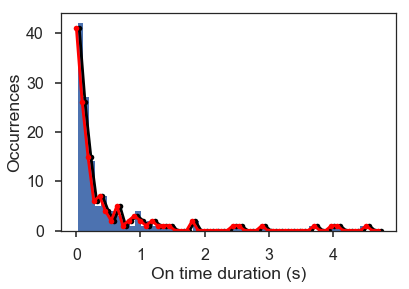

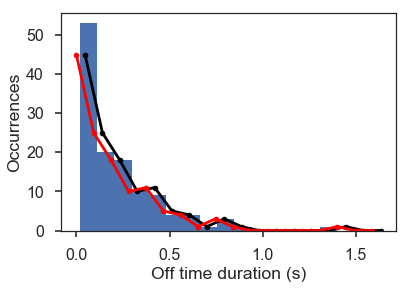

In [40]:
print("red data are histogram data and black data are shifted to be centered on the bin")

#fig, (ax1,ax2) = plt.subplots(2, 1, sharex=False)
fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'.-k')
ax1.plot(onbins,onhist[0],'.-r')
plt.hist(ontimes, bins=numonbins)
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')

# Apparently my digitize and the hist function don't quite give the same output. 
# I think the hist command doesn't start at zero.
# Either way is probably fine.

#plt.yscale('log')
#plt.show()
fig,ax2 = plt.subplots()
ax2.plot(centeredoffbins,offhist[0],'.-k')
ax2.plot(offbins,offhist[0],'.-r')
plt.hist(offtimes, bins=numoffbins)
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
#ax2.set_yscale('symlog')
plt.show()

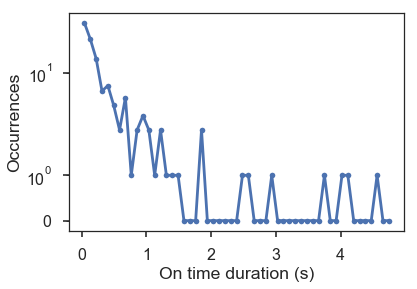

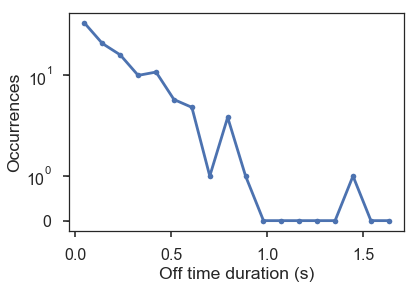

In [41]:
#fig, (ax1,ax2) = plt.subplots(2, 1, sharex=False)
fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'.-')
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
ax1.set_yscale('symlog')

#plt.yscale('log')
#plt.show()
fig,ax2 = plt.subplots()
ax2.plot(centeredoffbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
ax2.set_yscale('symlog')
plt.show()

In [42]:
from scipy.optimize import curve_fit
import scipy
scipy.__version__
# need at least version 14.0 of scipy.

'0.17.1'

In [43]:
def expfit(t, A, tau):
    return (A * np.exp(t/(-tau)))

# on time fit
onparams, onpcov = curve_fit(expfit, centeredonbins, onhist[0],p0 = (30, 0.8))
onfitx = np.linspace(min(centeredonbins),max(ontimes)+oninc*3,numonbins*5)
onfit = expfit(onfitx,onparams[0],onparams[1])

In [44]:
# Trying to find good guess
#onparams[1]=-.8
#onfit = 30 * np.exp(centeredonbins/(onparams[1]))

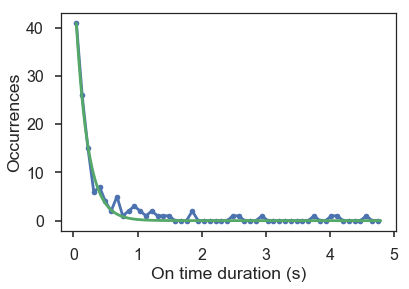

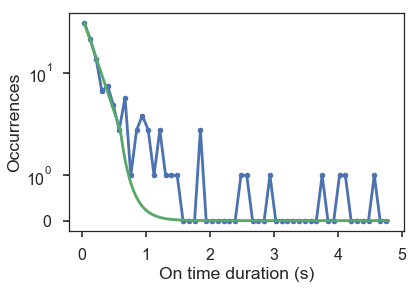

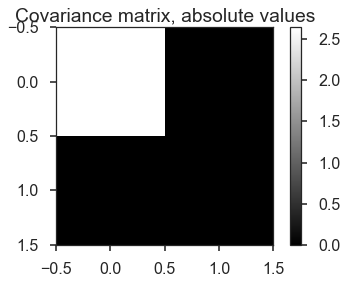

It's ok to use the uncertainties below as long as there aren't strong diagonal values.
Coefficient A = 52.2149583228 ± 1.62742658537
time constant tau = 0.185525742468 ± 0.00800635639497


In [45]:
fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'.-')
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(onfitx,onfit)
plt.show()

fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'.-')
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
ax1.set_yscale('symlog')
ax1.plot(onfitx,onfit)
plt.show()

plt.imshow(abs(onpcov), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong diagonal values.")



print  'Coefficient A = ' + str(onparams[0]) + ' ± ' + str(np.sqrt(onpcov[0,0]))
print 'time constant tau = ' + str(onparams[1]) + ' ± ' + str(np.sqrt(onpcov[1,1]))



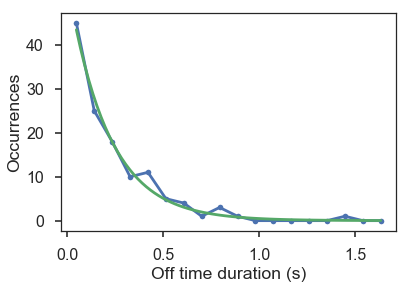

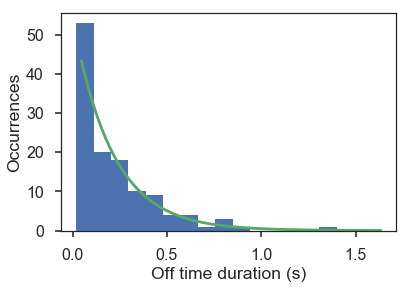

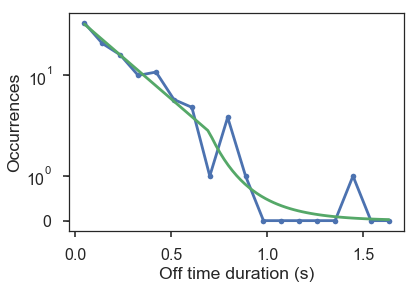

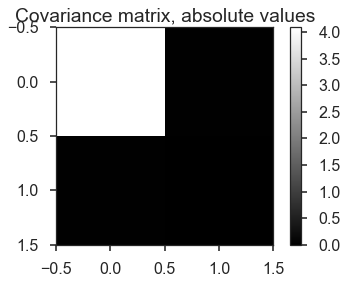

It's ok to use the uncertainties below as long as there aren't strong diagonal values.
Coefficient A = 54.2255608199 ± 2.02404414802
time constant tau = 0.210864518533 ± 0.0109404559536 sec


In [46]:
# off time fit
offparams, offpcov = curve_fit(expfit, centeredoffbins, offhist[0],p0 = (30, 0.8))
offfitx = np.linspace(min(centeredoffbins),max(offtimes)+2.5*offinc,numoffbins*5)
offfit = expfit(offfitx,offparams[0],offparams[1])

# display
fig,ax1 = plt.subplots()
ax1.plot(centeredoffbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.show()

fig,ax1 = plt.subplots()
plt.hist(offtimes, bins=numoffbins)
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
ax1.plot(offfitx,offfit)
plt.show()

fig,ax1 = plt.subplots()
ax1.plot(centeredoffbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.show()

plt.imshow(abs(offpcov), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong diagonal values.")



print  'Coefficient A = ' + str(offparams[0]) + ' ± ' + str(np.sqrt(offpcov[0,0]))
print 'time constant tau = ' + str(offparams[1]) + ' ± ' + str(np.sqrt(offpcov[1,1])) + ' sec'

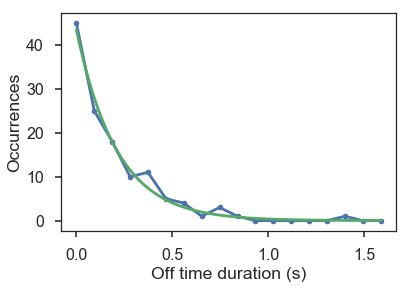

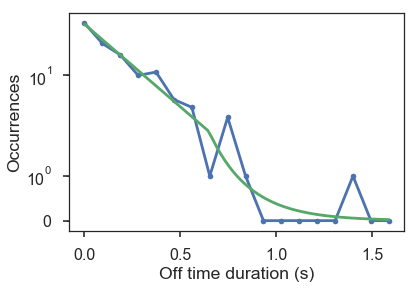

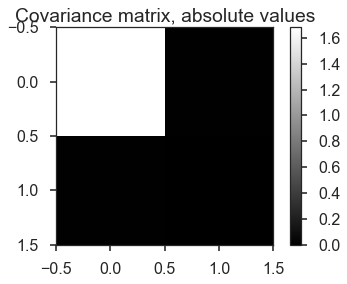

It's ok to use the uncertainties below as long as there aren't strong diagonal values.
Coefficient A = 43.4600347573 ± 1.29721897383
time constant tau = 0.210864169888 ± 0.0109402682494 sec


In [47]:
## I'm not sure whether the bins should be aligned left or center. 
# I already did centered alignment; 
# here's left alignment.
## It turns out it doesn't affect the characteristic time tau.

# off time fit
offparams, offpcov = curve_fit(expfit, offbins, offhist[0],p0 = (30, 0.8))
offfitx = np.linspace(min(offbins),max(offtimes)+2.0*offinc,numoffbins*5)
offfit = expfit(offfitx,offparams[0],offparams[1])

# plot
fig,ax1 = plt.subplots()
ax1.plot(offbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.show()

fig,ax1 = plt.subplots()
ax1.plot(offbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.show()

plt.imshow(abs(offpcov), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong diagonal values.")



print  'Coefficient A = ' + str(offparams[0]) + ' ± ' + str(np.sqrt(offpcov[0,0]))
print 'time constant tau = ' + str(offparams[1]) + ' ± ' + str(np.sqrt(offpcov[1,1])) + ' sec'

off time constant tau = 0.210864518533 ± 0.0109404559536 sec
on time constant tau = 0.185525742468 ± 0.00800635639497 sec


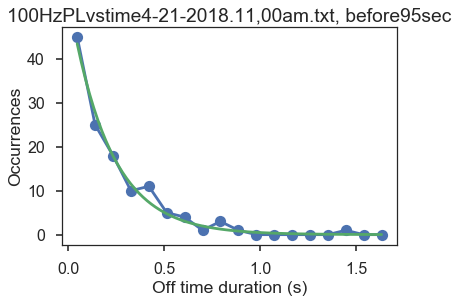

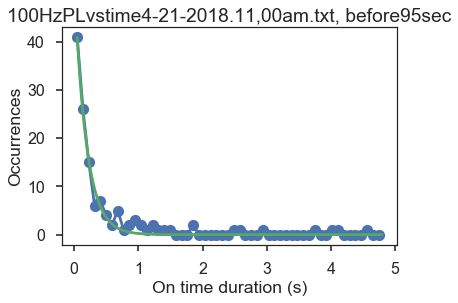

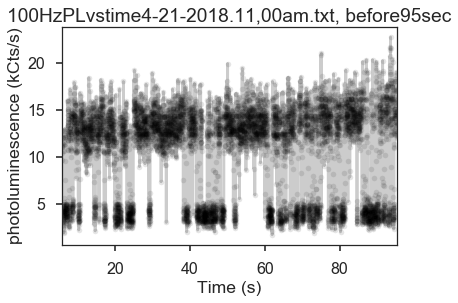

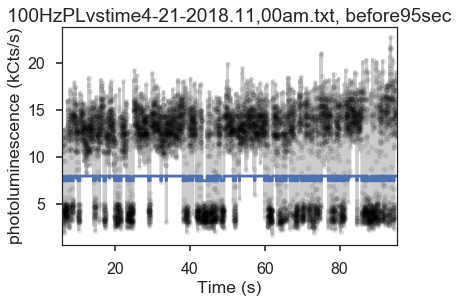

In [49]:
# Save figures

font = {'size'   : 22}

plt.rc('font', **font)

# OFF BLINKS
# off time fit
offparams, offpcov = curve_fit(expfit, centeredoffbins, offhist[0],p0 = (30, 0.8))
offfitx = np.linspace(min(centeredoffbins),max(offtimes)+2.5*offinc,numoffbins*5)
offfit = expfit(offfitx,offparams[0],offparams[1])

# display off blinks
fig,ax1 = plt.subplots()
ax1.plot(centeredoffbins,offhist[0],'o-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.title(filename)
plt.savefig(today + ',' + filename+'offblinks.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+'offblinks.png', bbox_inches='tight', dpi=200)


print 'off time constant tau = ' + str(offparams[1]) + ' ± ' + str(np.sqrt(offpcov[1,1])) + ' sec'


# On blinks
fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'o-')
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(onfitx,onfit)
plt.title(filename)

plt.savefig(today + ',' + filename+'onblinks.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+'onblinks.png', bbox_inches='tight', dpi=200)


print 'on time constant tau = ' + str(onparams[1]) + ' ± ' + str(np.sqrt(onpcov[1,1])) + ' sec'

fig1,axPL = plt.subplots()
#axPL.plot(data, 'k')
#axPL.legend.remove()
data.plot(marker='.',linestyle='None',legend=False, ax=axPL, color='k',  alpha=.1)
data.plot(legend=False, alpha=0.2, ax=axPL, color='k')
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)
plt.title(filename)

plt.savefig(today + ',' + filename+'blinking.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+'blinking.png', bbox_inches='tight', dpi=200)


fig2,axPL = plt.subplots()
data.plot(marker='.',linestyle='None',legend=False, alpha=0.1, ax=axPL, color='k')
data.plot(legend=False, alpha=0.2, ax=axPL, color='k')
threshdata.plot(legend=False)
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)
plt.title(filename)

plt.savefig(today + ',' + filename+'blinkingandthreshold.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+'blinkingandthreshold.png', bbox_inches='tight', dpi=200)


plt.show()